Copyright (C) 2023 201800294_DongilKim All rights reserved <U>_(https://KimTein.github.io)_</U>

Ch_16_assignment

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Integration

## Importing Modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath

sympy.init_printing()

## Numerical Integraion Methods

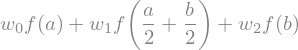

In [7]:
a, b, X = sympy.symbols("a, b, x")
f = sympy.Function("f")

x = a, (a+b)/2, b # for Simpson's rule
w = [sympy.symbols("w_%d" % i) for i in range(len(x))]

q_rule = sum([w[i] * f(x[i]) for i in range(len(x))]) 
q_rule

In [9]:
phi = [sympy.Lambda(X, X**n) for n in range(len(x))]
phi

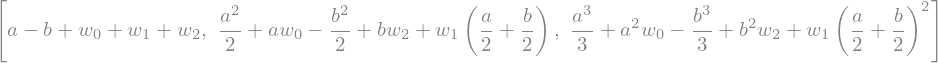

In [10]:
eqs = [q_rule.subs(f, phi[n]) - sympy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]
eqs

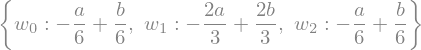

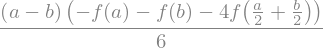

In [11]:
w_sol = sympy.solve(eqs, w)
w_sol

q_rule.subs(w_sol).simplify()

## Numerical Integration with Scipy

In [12]:
def f(x):
    return np.exp(-x**2)
val, err = integrate.quad(f, -1, 1)

val

err

In [13]:
def f(x, a, b, c):
    return a * np.exp(-((x-b)/c)**2)

val, err = integrate.quad(f, -1, 1, args = (1, 2, 3))
val
err

In [14]:
from scipy.special import jv
f = lambda x: jv(0, x)
val, err = integrate.quad(f, 0, 5)
val
err

In [15]:
f = lambda x: np.exp(-x**2)
val, err = integrate.quad(f, -np.inf, np.inf)
val

err

In [17]:
f = lambda x: 1/np.sqrt(abs(x))
a, b = -1, 1
integrate.quad(f, a, b)

integrate.quad(f, a, b, points=[0])

/var/folders/r1/8vnnkyjn3h3b_tnp2010w6nm0000gn/T/ipykernel_12186/2733451217.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  f = lambda x: 1/np.sqrt(abs(x))


Text(0.5, 0, '$x$')

Text(0, 0.5, '$f(x)$')

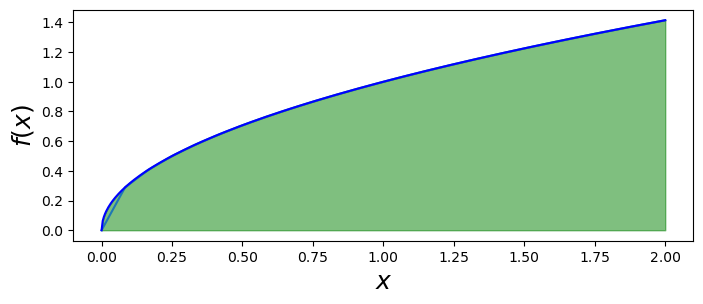

In [23]:
f = lambda x: np.sqrt(x)
a, b = 0, 2
x = np.linspace(a, b, 25)
y = f(x)
fig, ax = plt.subplots(figsize=(8, 3))
ax. plot(x, y)
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha= 0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)

val_trapz = integrate.trapz(y, x)
val_trapz

val_simps = integrate.simps(y, x)
val_simps


*****************************************************************************
Reference<br>
*    Title: Physics Programming Lecture Note (INU)
*    Author: Jeongwoo Kim, Ph.D.
*    Availability: https://sites.google.com/view/jeongwookim
  
****************************************************************************

Copyright (C) 2023 201800294_DongilKim All rights reserved <U>_(https://KimTein.github.io)_</U>